**Exercice**
session_09_09_2022
##### plusieurs employees

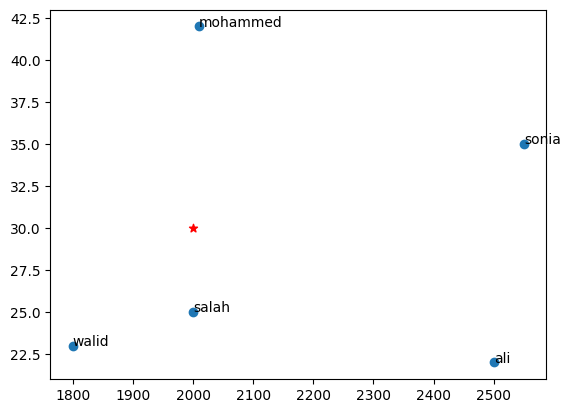

['salah' '2000' '25']


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

names = ["ali", "sonia", "mohammed", "salah", "walid"]
salaries = [2500, 2550, 2009, 2000, 1800]
ages = [22, 35, 42, 25, 23]

req = np.array([2000, 30])

#draw a scatter plot with salaries on x-axis and ages on y-axis and names as labels for each point and req as a red star
plt.scatter(salaries, ages)
plt.scatter(req[0], req[1], c="red", marker="*")
for i in range(len(names)):
    plt.annotate(names[i], (salaries[i], ages[i]))
plt.show()


employees = np.array([names, salaries, ages]).T

ne = employees.shape[0]

distances = np.empty(ne)

for i in range(ne):
    distances[i] = euclidean(req, employees[i, 1:].astype(float))

# find the closest employee to req
print(employees[np.argmin(distances)])

**Probability and Statistics**

In [5]:
from numpy.random import standard_normal, normal, multivariate_normal

# random numbers generator from standard normal distribution
standard_normal(5)

array([ 0.85770106,  0.73567552,  0.11051542, -0.11396836, -1.60195573])

In [6]:
# random numbers generator from normal distribution with mean 10 and std 2
x = normal(loc=30, scale=0.00001, size=10)

In [7]:
np.mean(x)

29.999999628393784

In [8]:
np.var(x)

1.0534897971209075e-10

In [9]:
# random numbers generator from multivariate normal distribution with mean 10 and std 2
mu = np.array([1500, 30]) # arithmetique average of salary and age
sigma = np.array([[0.00001, 0], [0, 0.00001]])
multivariate_normal(mean=mu, cov=sigma, size=10)

array([[1500.00300812,   29.99847211],
       [1499.99973818,   29.99730455],
       [1500.00422243,   29.99801706],
       [1499.99772122,   29.99780201],
       [1500.00126066,   30.00550782],
       [1499.99248556,   29.99779518],
       [1500.00200618,   30.00342983],
       [1499.99739194,   29.99923268],
       [1499.99669675,   30.00671483],
       [1499.99734623,   30.00574957]])

In [10]:
# random numbers generator from multivariate normal distribution with mean 10 and std 2
mu = np.array([1500, 30]) # arithmetique average of salary and age
sigma = np.array([[1000, 0], [0, 0.00001]])
multivariate_normal(mean=mu, cov=sigma, size=10)

array([[1554.0095308 ,   29.99477148],
       [1479.97786379,   29.99778807],
       [1457.38297155,   30.00339072],
       [1543.80015069,   30.0051827 ],
       [1471.94613992,   29.99841882],
       [1488.78666808,   29.99758081],
       [1477.80305375,   29.99934973],
       [1532.60742939,   29.99813399],
       [1494.3473732 ,   30.00018532],
       [1476.60314809,   30.00052104]])

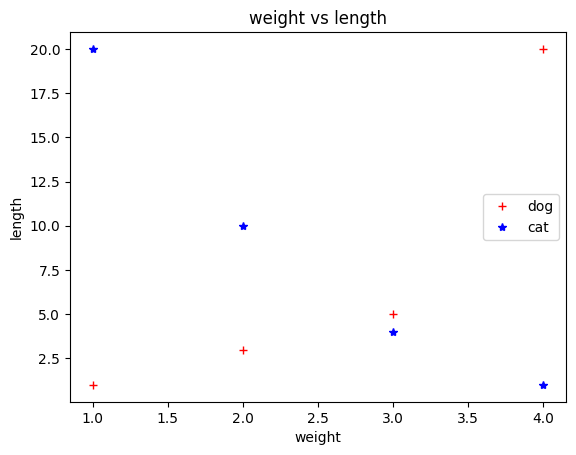

In [11]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],[1,3,5,20], "r+")
plt.plot([1,2,3,4],[20,10,4,1], "b*")
plt.xlabel("weight")
plt.ylabel("length")
plt.title("weight vs length")
plt.legend(["dog", "cat"])
plt.show()

C:\Users\abbas\AppData\Local\Temp\ipykernel_2104\2014381152.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  employees = multivariate_normal(mean=mu, cov=sigma, size=10)


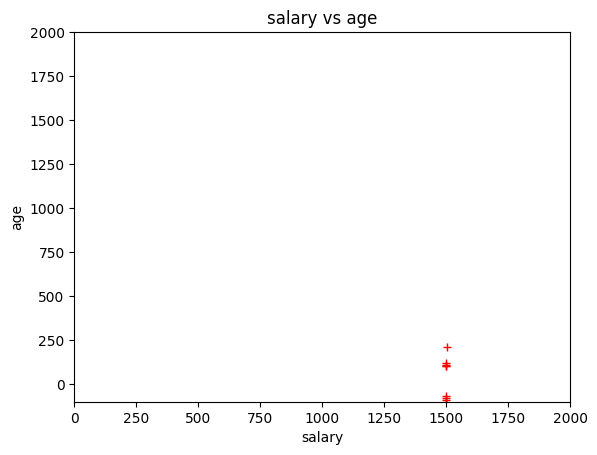

In [12]:
# random numbers generator from multivariate normal distribution with mean 10 and std 2
mu = np.array([1500, 30]) # arithmetique average of salary and age
sigma = np.array([[1, 100], [0, 10000]])
employees = multivariate_normal(mean=mu, cov=sigma, size=10)

plt.plot(employees[:, 0], employees[:, 1], "r+")
plt.xlabel("salary")
plt.ylabel("age")
plt.xlim([0,2000])
plt.ylim([-100,2000])
plt.title("salary vs age")
plt.show()



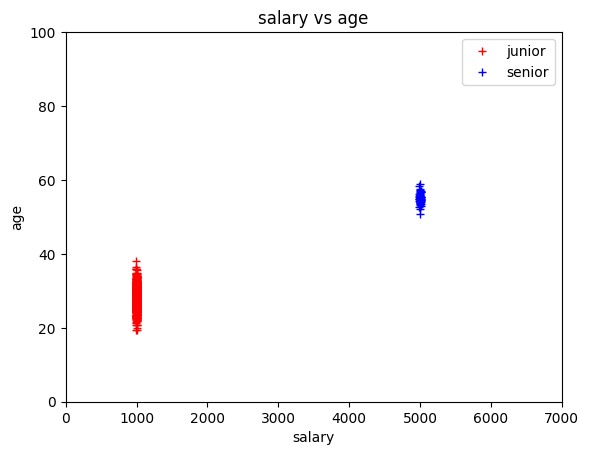

In [16]:
from numpy.random import standard_normal, normal, multivariate_normal
import matplotlib.pyplot as plt

# random numbers generator from multivariate normal distribution with mean 10 and std 2
#juniors
mu1 = np.array([1000, 28]) # arithmetique average of salary and age
sigma1 = np.array([[5, 0], [0, 10]])
junior = multivariate_normal(mean=mu1, cov=sigma1, size=500)

#seniors
mu2 = np.array([5000, 55]) # arithmetique average of salary and age
sigma2 = np.array([[100, 0], [0, 2]])
senior = multivariate_normal(mean=mu2, cov=sigma2, size=50)

plt.plot(junior[:, 0], junior[:, 1], "r+", label = "junior")
plt.plot(senior[:, 0], senior[:, 1], "b+", label = "senior")
plt.xlabel("salary")
plt.ylabel("age")
plt.xlim([0,7000])
plt.ylim([0,100])
plt.title("salary vs age")
plt.legend()
plt.show()

**Bayes' theorem (Théorème de Bayes):** P(A/B) = P(B/A) * P(A) / P(B)

**Travail demandé:**

On veut decider pour un nouvel employé (requete) s'il appartient à la classe des employés seniors ou à la classe des employés jeniors ?
  
      Exemple: 
        
        Nom: Safa
        Salaire: 4500
        Age: 46

        Décision: Safa est senior
      

**Solution 1 (kmeans)**

1. Calculer la moyenne arithmétique de chaque classe (jeniors et seniors): mu_seniors et mu_juniors
2. Calculer la distance euclidienne entre :
     - requete et mu_seniors
     - requete et mu_juniors
3. Decider en se basant sur les distances obtenues

In [23]:
from numpy.random import standard_normal, normal, multivariate_normal
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

#juniors
mu1 = np.array([1000, 28]) # arithmetique average of salary and age
sigma1 = np.array([[5, 0], [0, 10]])
junior = multivariate_normal(mean=mu1, cov=sigma1, size=500)

#seniors
mu2 = np.array([5000, 55]) # arithmetique average of salary and age
sigma2 = np.array([[100, 0], [0, 2]])
senior = multivariate_normal(mean=mu2, cov=sigma2, size=50)

# requette 
req = np.array([4500, 46])

# calculer la moyenne arithmétique de chaque classe 
mu_seniors = np.mean(senior, axis=0)
mu_juniors = np.mean(junior, axis=0)

# claculer la distance euclidenne entre requette et mu_seniors

distance_euclidean_req_senior = euclidean(req, mu_seniors)
distance_euclidean_req_junior = euclidean(req, mu_juniors)

# decider en se basant sur les distance obtenues
if distance_euclidean_req_senior < distance_euclidean_req_junior:
    print("Safa est senior")
else:
    print("Safa est junior")

Safa est senior


**Solution 2 (knn)**

1. Concaténer verticalement les employés seniors et juniors dans une seule matrice que vous appelez X
  
        Note: 
        Utiliser la fonction X=np.vstack([X1,X2])

2. Génerer un vecteur labels de dimension=nombre total des employés 

  Ce vecteur labels contient des valeurs soit 1 ou 2 seulement comme suit :
    - valeur 1 qui indique que l'employé est junior
    - valeur 2 qui indique que l'employé est senior

3. Calculer les distances entre requete et tous les employés X

4. Trier les indices des employés par proximité à la requete (en se basant sur les distances obtenues).

  Garder juste les k=5 les plus proches seulement

5. En utilisant les k indices triés et les labels, determiner la classe (junior ou senior) qui est la plus proche de la requete ?

**Solution 3 (gmm):**

1. Estimer la loi gaussienne (mu,sigma) de chacune de 2 classes de population (seniors et juniors :
 - G_seniors : mu_seniors et sigma_seniors des seniors
 - G_juniors : mu_geniors et sigma_geniors des juniors

  Note: Utiliser les fonctions suivantes:
 - np.mean(X) pour calculer la moyenne arithmétique
 - np.cov(X.T) pour calculer la covariance

2. Calculer la vraisemblance de la requete dans chaque classe

  Note: La vraisemblance d'une donnée selon une classe est la probabilité de cette donnée selon la loi qui caractérise la classe.
  
  - La vraisemblance de la requete selon la classe seniors :
 
    vrais_requete_seniors =  probabilité de requete selon la loi normale multivariée (mu_seniors , sigma_seniors)
  - La vraisemblance de la requete selon la classe juniors :
    vrais_requete_juniors =  probabilité de requete selon la loi normale multivariée (mu_juniors , sigma_juniors)

  Note: Utiliser la fonction pdf de la classe multivariate_normal de module scipy.stats comme suit :
          Exemple: Soit la loi normale multivariée G=(mu,sigma). 
          La probabilité de x selon la loi G est calculé comme suit :
          mn=multivariate_normal(mu,sigma)
          mn.pdf(x)

3. Calculer la probabilité prior de chaque classe:

  Note: La probabilité prior d'une classe est le poids de la classe dans la population globale.

 - proba_prior_seniors=cardinal_seniors/nombre total d'employés
 - proba_prior_juniors=cardinal_juniors/nombre total d'employés

4. Pour décider sur l'appartenance d'un employé à une classe, on peut utiliser le théorème de Bayes. 

  Note: Théorème de Bayes
  La probailité posterior = probabilité n va appliquer le théoreme de Bayes pour calculer la probabilté posterior de la requete étant donn é chaque classe comme suit :
- proba_post_requete_seniors = vrais_requete_seniors x proba_prior_seniors
- proba_post_requete_juniors = vrais_requete_juniors x proba_prior_juniors

  L'employé requete appartient à la classe qui donne la probabilté posterior la plus elevée

